<a href="https://colab.research.google.com/github/friesipayung/Cats-And-Dogs/blob/master/Cats_and_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!nvidia-smi

Fri Apr 17 16:41:07 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    23W /  75W |    207MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image

# importing libraries for Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2020-04-17 16:40:24--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.128, 2a00:1450:4013:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  73.4MB/s    in 0.9s    

2020-04-17 16:40:25 (73.4 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
!rm -r /content/cats_and_dogs_filtered

rm: cannot remove '/content/cats_and_dogs_filtered': No such file or directory


In [0]:
!unzip -q /content/cats_and_dogs_filtered.zip

In [0]:
path = "/content/cats_and_dogs_filtered" #@param {type:"string"}

In [0]:
train_path = path + "/train"
test_path = path + "/validation"


train_path_cats = train_path + '/cats'
train_path_dogs = train_path + '/dogs'
test_path_cats = test_path + '/cats'
test_path_dogs = test_path + '/dogs'

In [7]:
print('number of cats training images - ',len(os.listdir(train_path_cats)))
print('number of dogs training images - ',len(os.listdir(train_path_dogs)))
print('number of cats testing images - ',len(os.listdir(test_path_cats)))
print('number of dogs testing images - ',len(os.listdir(test_path_dogs)))

number of cats training images -  1000
number of dogs training images -  1000
number of cats testing images -  500
number of dogs testing images -  500


In [0]:
data_generator = ImageDataGenerator(rescale = 1.0/255.0, zoom_range = 0.2)

In [9]:
batch_size = 32
training_data = data_generator.flow_from_directory(directory = train_path,
                                                   target_size = (64, 64),
                                                   batch_size = batch_size,
                                                   class_mode = 'binary')
testing_data = data_generator.flow_from_directory(directory = test_path,
                                                  target_size = (64, 64),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
# preparing the layers in the Convolutional Deep Neural Network
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = training_data.image_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.3))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.2))
model.add(Conv2D(filters = 126, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.15))
model.add(Flatten())
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(rate = 0.15))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(units = len(set(training_data.classes)), activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 126)       7

In [13]:
fitted_model = model.fit_generator(training_data,
                        steps_per_epoch = 1000,
                        epochs = 25,
                        validation_data = testing_data,
                        validation_steps = 1000)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
1000/1000 [==============================] - 205s 205ms/step - loss: 0.6597 - accuracy: 0.5818 - val_loss: 0.5830 - val_accuracy: 0.6960
Epoch 2/25
1000/1000 [==============================] - 200s 200ms/step - loss: 0.4812 - accuracy: 0.7648 - val_loss: 0.5324 - val_accuracy: 0.7402
Epoch 3/25
1000/1000 [==============================] - 199s 199ms/step - loss: 0.3110 - accuracy: 0.8653 - val_loss: 0.6843 - val_accuracy: 0.7330
Epoch 4/25
1000/1000 [==============================] - 199s 199ms/step - loss: 0.2014 - accuracy: 0.9191 - val_loss: 0.7038 - val_accuracy: 0.7381
Epoch 5/25
1000/1000 [==============================] - 199s 199ms/step - loss: 0.1545 - accuracy: 0.9398 - val_loss: 0.7535 - val_accuracy: 0.7500
Epoch 6/25
1000/1000 [==============================] - 199s 199ms/step - loss: 0.1231 - accuracy: 0.9540 - val_loss: 0.8198 - val_accuracy: 0.7437
Epoch 7/25
1000/1000 [==============

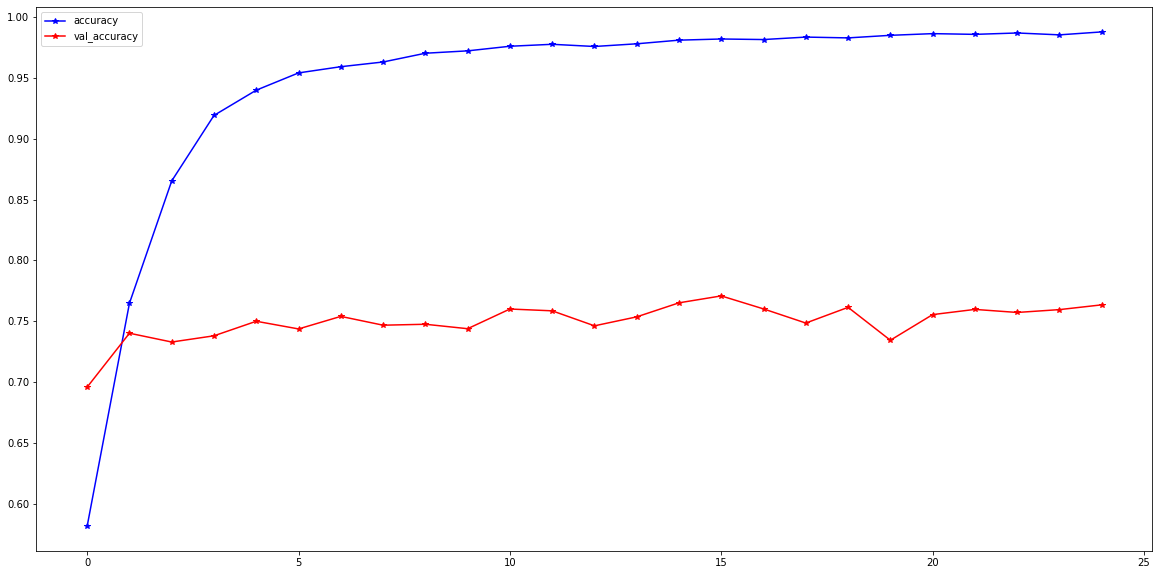

In [41]:
# plotting accuracy and validation accuracy
plt.figure(figsize=(20,10)) 

accuracy = fitted_model.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'b*-', label = 'accuracy')
val_accuracy = fitted_model.history['val_accuracy']
plt.plot(range(len(val_accuracy)), val_accuracy, 'r*-', label = 'val_accuracy')
plt.legend()

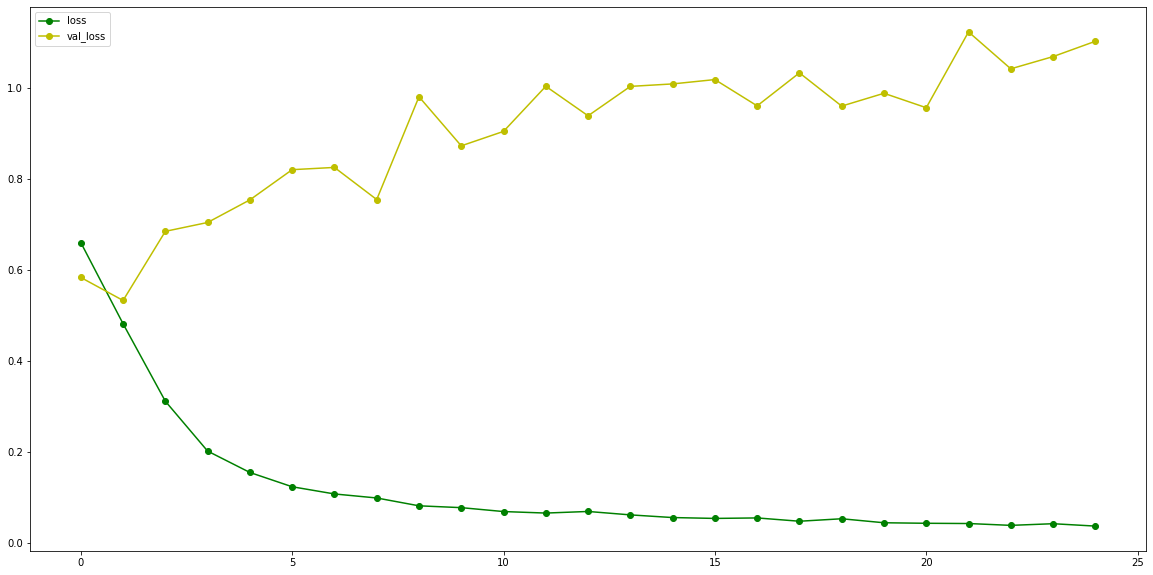

In [40]:
plt.figure(figsize=(20,10)) 

plt.plot(range(len(loss)), loss, 'go-', label = 'loss')
val_loss = fitted_model.history['val_loss']
plt.plot(range(len(val_loss)), val_loss, 'yo-', label = 'val_loss')
plt.legend()

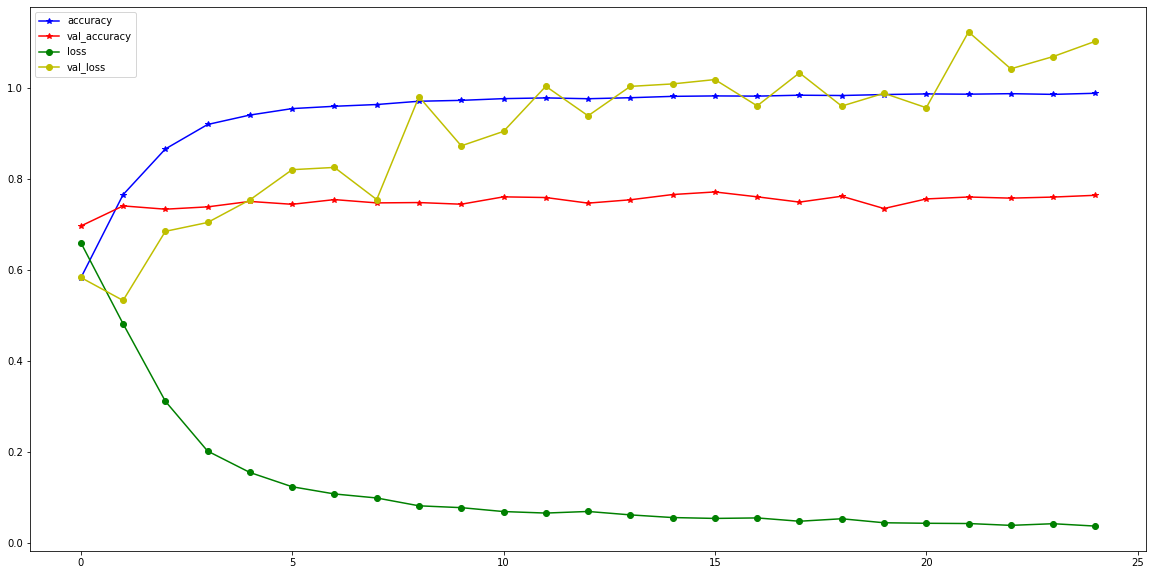

In [39]:
plt.figure(figsize=(20,10)) 

accuracy = fitted_model.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'b*-', label = 'accuracy')
val_accuracy = fitted_model.history['val_accuracy']
plt.plot(range(len(val_accuracy)), val_accuracy, 'r*-', label = 'val_accuracy')
loss = fitted_model.history['loss']
plt.plot(range(len(loss)), loss, 'go-', label = 'loss')
val_loss = fitted_model.history['val_loss']
plt.plot(range(len(val_loss)), val_loss, 'yo-', label = 'val_loss')
plt.legend()

In [0]:
# https://www.kaggle.com/jsvishnuj/cats-dogs-classification-using-cnn

In [26]:
fitted_model.history

{'accuracy': [0.5818009972572327,
  0.7648374438285828,
  0.8652973771095276,
  0.9191028475761414,
  0.9398311376571655,
  0.9540070295333862,
  0.9591103792190552,
  0.9629722833633423,
  0.9701675772666931,
  0.9721207022666931,
  0.9759009480476379,
  0.9775075316429138,
  0.9757119417190552,
  0.9779170751571655,
  0.9809097647666931,
  0.9818639755249023,
  0.9814137816429138,
  0.9834299683570862,
  0.9827684164047241,
  0.9848790168762207,
  0.9862651228904724,
  0.9856665730476379,
  0.9868006706237793,
  0.9852644801139832,
  0.9876827001571655],
 'loss': [0.6596987843513489,
  0.48124638199806213,
  0.3110295236110687,
  0.2014426440000534,
  0.15445111691951752,
  0.12306573241949081,
  0.10725811123847961,
  0.09841177612543106,
  0.08119483292102814,
  0.07715462148189545,
  0.06857041269540787,
  0.0652586817741394,
  0.06876971572637558,
  0.061259761452674866,
  0.055397581309080124,
  0.053483493626117706,
  0.05457114800810814,
  0.04730135202407837,
  0.052745912224

In [42]:
fitted_model.params

{'epochs': 25, 'steps': 1000, 'verbose': 1}